# 1.- Letter recognition using three ML models.

Load the letter recognition dataset.


In [12]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
letter_recognition = fetch_ucirepo(id=59) 
  
# data (as pandas dataframes) 
X = letter_recognition.data.features 
y = letter_recognition.data.targets 
  
# metadata 
print(letter_recognition.metadata) 


  letter  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      T          2          8          3          5          1          8   
1      I          5         12          3          7          2         10   
2      D          4         11          6          8          6         10   
3      N          7         11          6          6          3          5   
4      G          2          1          3          1          1          8   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0         13          0          6           6          10           8   
1          5          5          4          13           3           9   
2          6          2          6          10           3           7   
3          9          4          6           4           4          10   
4          6          6          6           6           5           9   

   feature_13  feature_14  feature_15  feature_16  
0           0           8         

In [4]:
# variable information 
print(letter_recognition.variables) 

     name     role         type demographic                    description  \
0   lettr   Target  Categorical        None                 capital letter   
1   x-box  Feature      Integer        None     horizontal position of box   
2   y-box  Feature      Integer        None       vertical position of box   
3   width  Feature      Integer        None                   width of box   
4    high  Feature      Integer        None                  height of box   
5   onpix  Feature      Integer        None              total # on pixels   
6   x-bar  Feature      Integer        None     mean x of on pixels in box   
7   y-bar  Feature      Integer        None     mean y of on pixels in box   
8   x2bar  Feature      Integer        None                mean x variance   
9   y2bar  Feature      Integer        None                mean y variance   
10  xybar  Feature      Integer        None           mean x y correlation   
11  x2ybr  Feature      Integer        None              mean of

Split the data into traind and test (using 70% of the data for training and 30% for testing)

In [8]:
#!pip install -U scikit-learn


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 6.1 MB/s eta 0:00:0000:0100:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Train and evaluate the models Random Forest, SVM and KNN

In [27]:
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

cv_results = {}
for model_name, model in models.items():
    cv_score = cross_val_score(model, X_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cv_results[model_name] = cv_score
    print(f'{model_name} 10-fold CV Mean Accuracy: {np.mean(cv_score):.3f}')

Random Forest 10-fold CV Mean Accuracy: 0.958
SVM 10-fold CV Mean Accuracy: 0.916
K-Nearest Neighbors 10-fold CV Mean Accuracy: 0.944


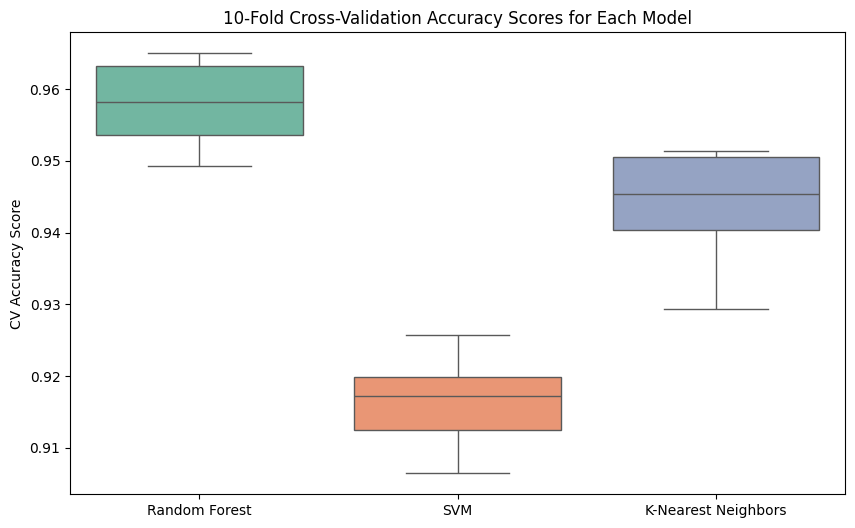

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=list(cv_results.values()), palette="Set2")
plt.xticks(range(len(models)), list(models.keys()))
plt.ylabel("CV Accuracy Score")
plt.title("10-Fold Cross-Validation Accuracy Scores for Each Model")
plt.show()

Hyperparameter tuning

In [31]:
param_grids = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
}

best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=10, scoring='accuracy')
    grid_search.fit(X_train, y_train.values.ravel())
    best_models[model_name] = grid_search.best_estimator_
    print(f'{model_name} Best Hyperparameters: {grid_search.best_params_}')

Random Forest Best Hyperparameters: {'max_depth': None, 'n_estimators': 200}
SVM Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
K-Nearest Neighbors Best Hyperparameters: {'n_neighbors': 5, 'weights': 'distance'}


Evaluate the models with the best parameters

In [35]:
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Hold-out Test Accuracy: {accuracy:.3f}')

Random Forest Hold-out Test Accuracy: 0.961
SVM Hold-out Test Accuracy: 0.962
K-Nearest Neighbors Hold-out Test Accuracy: 0.955


As we can see, the model with the highest accuracy was Random Forest.